In [1]:
pip install pokemontcgsdk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from PIL import Image
import io

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pokemontcgsdk import Card
from pokemontcgsdk import Set
from pokemontcgsdk import Type
from pokemontcgsdk import Supertype
from pokemontcgsdk import Subtype
from pokemontcgsdk import Rarity

In [4]:
from pokemontcgsdk import RestClient

RestClient.configure('f5857f8a-fd32-489d-829d-d4568453eb52')

In [5]:
import pandas as pd

url = 'https://play.pokemonshowdown.com/data/pokedex.json'
params = {}
resp = requests.get(url=url, params=params)
data = resp.json() # Check the JSON Response Content documentation below

df = pd.DataFrame(data).T
df = df[df.num >0] # get rid of custom stuff
df = df[df.num <= 1008] # only the real pokemon

df["links"] = df.name.str.replace(" ", "-").str.lower()
df["species"] = df.baseSpecies.fillna(df.name)

clms = ["links", "species"]
df = df[clms]
df

,links,species
bulbasaur,bulbasaur,Bulbasaur
ivysaur,ivysaur,Ivysaur
venusaur,venusaur,Venusaur
venusaurmega,venusaur-mega,Venusaur
venusaurgmax,venusaur-gmax,Venusaur
...,...,...
chiyu,chi-yu,Chi-Yu
roaringmoon,roaring-moon,Roaring Moon
ironvaliant,iron-valiant,Iron Valiant
koraidon,koraidon,Koraidon


In [6]:
import os
cwd = os.getcwd()
cwd, _ = os.path.split(cwd)
folder = "dataset"
os.path.join(cwd, folder)

'/Users/fynn/Projects/PokeDex/dataset'

In [7]:
def get_urls_for_pkmn(pkmn_name: str) -> list[str]:
    res = []
    cards = Card.where(q=f'name:{pkmn_name}')
    for card in cards:
        img_uri = card.__dict__["images"].__dict__["small"]
        res.append(img_uri)

    return res

#get_urls_for_pkmn("")

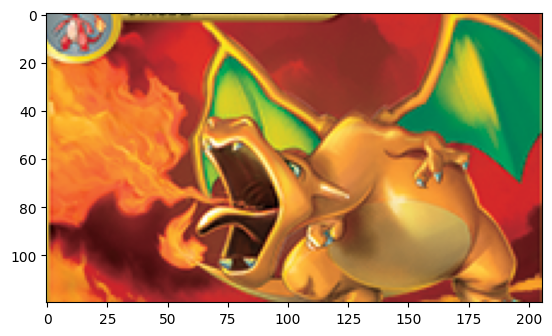

In [8]:
def get_img_from_uri(img_uri: str) -> np.array:
    response = requests.get(img_uri)
    if response.status_code != 200:
        print(f"did not find {uri}: {response.reason}")
    
    img = Image.open(io.BytesIO(response.content))
    img = np.array(img)
    img = img[40: 160, 19: -20]
    return img

img = get_img_from_uri("https://images.pokemontcg.io/dp7/103.png")
plt.imshow(img);

In [9]:
import os
cwd = os.getcwd()
cwd, _ = os.path.split(cwd)
folder = "dataset"
os.path.join(cwd, folder)

'/Users/fynn/Projects/PokeDex/dataset'

In [12]:
from time import sleep

for i, pkmn in df.reset_index(drop=True)[130:].iterrows():
    link, species = pkmn
    
    # we save to species
    try:
        pkmn_uris = get_urls_for_pkmn(pkmn_name=species)
        print(f"{i:0>3} - {i/ df.shape[0] :.3%} {species}/{link}: {len(pkmn_uris)}", end="\n")
    except Exception as e:
        continue
        print(f"Encountered an excepion when scraping for {species}:\n{e}")
        continue
    
    for j, uri in enumerate(pkmn_uris):

        # I messed up in the naming in the beginning
        path = os.path.join(cwd, folder, species, f"pokemontcg{j:0<4}.png")
        if os.path.isfile(path):
            os.remove(path)
        
        path = os.path.join(cwd, folder, species, f"pokemontcg{j:0>4}.png")

        if "https://images.pokemontcg.io/mcd" in uri:
            if os.path.isfile(path):
                os.remove(path)
            else:
                pass
            continue
            
        if os.path.isfile(path):
            continue
        
        
        img = get_img_from_uri(uri)
        img = Image.fromarray(img)
        img.save(path)

        sleep(0.001)
        

130 - 10.000% Slowbro/slowbro-mega: 24
131 - 10.077% Slowbro/slowbro-galar: 24
132 - 10.154% Magnemite/magnemite: 44
133 - 10.231% Magneton/magneton: 41
136 - 10.462% Doduo/doduo: 20
137 - 10.538% Dodrio/dodrio: 18
138 - 10.615% Seel/seel: 18
139 - 10.692% Dewgong/dewgong: 16
140 - 10.769% Grimer/grimer: 24
141 - 10.846% Grimer/grimer-alola: 24
142 - 10.923% Muk/muk: 31
143 - 11.000% Muk/muk-alola: 31
144 - 11.077% Shellder/shellder: 14
145 - 11.154% Cloyster/cloyster: 14
146 - 11.231% Gastly/gastly: 29
147 - 11.308% Haunter/haunter: 26
148 - 11.385% Gengar/gengar: 43
149 - 11.462% Gengar/gengar-mega: 43
150 - 11.538% Gengar/gengar-gmax: 43
151 - 11.615% Onix/onix: 28
152 - 11.692% Drowzee/drowzee: 22
153 - 11.769% Hypno/hypno: 21
154 - 11.846% Krabby/krabby: 11
155 - 11.923% Kingler/kingler: 12
156 - 12.000% Kingler/kingler-gmax: 12
157 - 12.077% Voltorb/voltorb: 37
158 - 12.154% Voltorb/voltorb-hisui: 37
159 - 12.231% Electrode/electrode: 44
160 - 12.308% Electrode/electrode-hisui: 4